## Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sb.set_style('darkgrid')

## Loading  Data

In [16]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
data = data.set_index('Id').rename(columns={'SepalLengthCm':'Sepal length',
                                           'SepalWidthCm':'Sepal Width',
                                  'PetalLengthCm': 'Petal Length',
                                  'PetalWidthCm': 'Petal Width'})
data

,Sepal length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## Data Exploration 

In [18]:
print(data.shape)

(150, 5)


In [19]:
#details of data
data.describe()

,Sepal length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
data.isna().sum().to_frame('Null Value')

,Null Value
Sepal length,0
Sepal Width,0
Petal Length,0
Petal Width,0
Species,0


In [21]:
# Checking correlation between data
data.corr()

,Sepal length,Sepal Width,Petal Length,Petal Width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


## Data Visualization

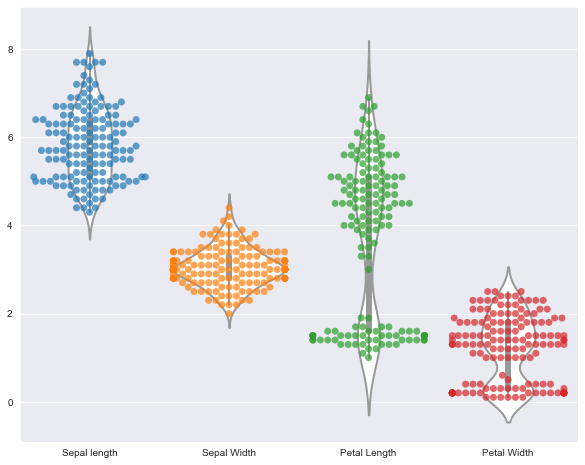

In [24]:
plt.figure(figsize=(10,8))
sb.violinplot(data=data, color='white', linewidth=2)
sb.swarmplot(data=data, s=7,alpha=0.7)
plt.show()

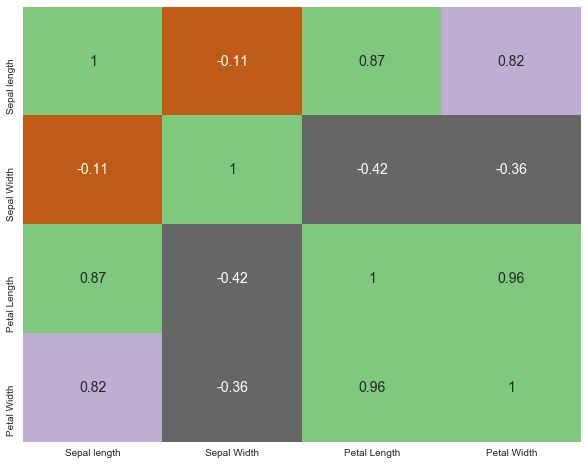

In [26]:
# Correlation between Variables
plt.figure(figsize=(10,8))
sb.heatmap(data.corr(), cmap='Accent_r', annot=True, cbar=False, annot_kws={'size':14})
plt.show()

## Decision Tree Classifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Creating training & test set 

In [29]:
X = data.drop('Species', axis=1)
Y = data['Species']
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {Y.shape}')

Shape of X: (150, 4)
Shape of y: (150,)


### Splitting data into training and test set

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.5,random_state=0)

In [41]:
print(f'Shape of X_train: {x_train.shape}')
print(f'Shape of X_test: {x_test.shape}')
print(f'Shape of Y_train: {y_train.shape}')
print(f'Shape of Y_test: {y_test.shape}')

Shape of X_train: (75, 4)
Shape of X_test: (75, 4)
Shape of Y_train: (75,)
Shape of Y_test: (75,)


In [42]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_pred = model.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

,Actual,Predicted
Id,,
115,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
34,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
...,...,...
112,Iris-virginica,Iris-virginica
96,Iris-versicolor,Iris-versicolor
21,Iris-setosa,Iris-setosa


### Evaluation 

In [45]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


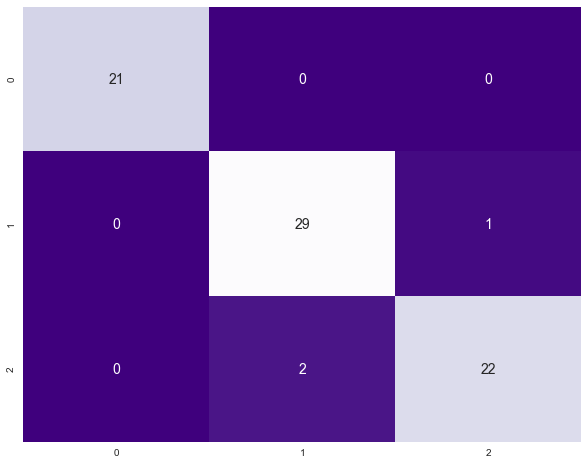

In [49]:
plt.figure(figsize=(10,8))
sb.heatmap(matrix, cmap='Purples_r',annot=True, cbar=False, annot_kws={'size':14})
plt.show()

In [50]:
print(f'Accuracy: {np.round(metrics.accuracy_score(y_test, y_pred), decimals=2)}')

Accuracy: 0.96


### Visualization

In [51]:
from sklearn import tree
text = tree.export_text(model)
print(text)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 5.05
|   |   |--- feature_3 <= 1.75
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  5.05
|   |   |--- class: Iris-virginica



### Ploting tree using Tree_plot

In [52]:
features = data.columns.tolist()[:-1]
target = data.Species.unique()
print(f'Features: {features}\n Target:{target}')

Features: ['Sepal length', 'Sepal Width', 'Petal Length', 'Petal Width']
 Target:['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


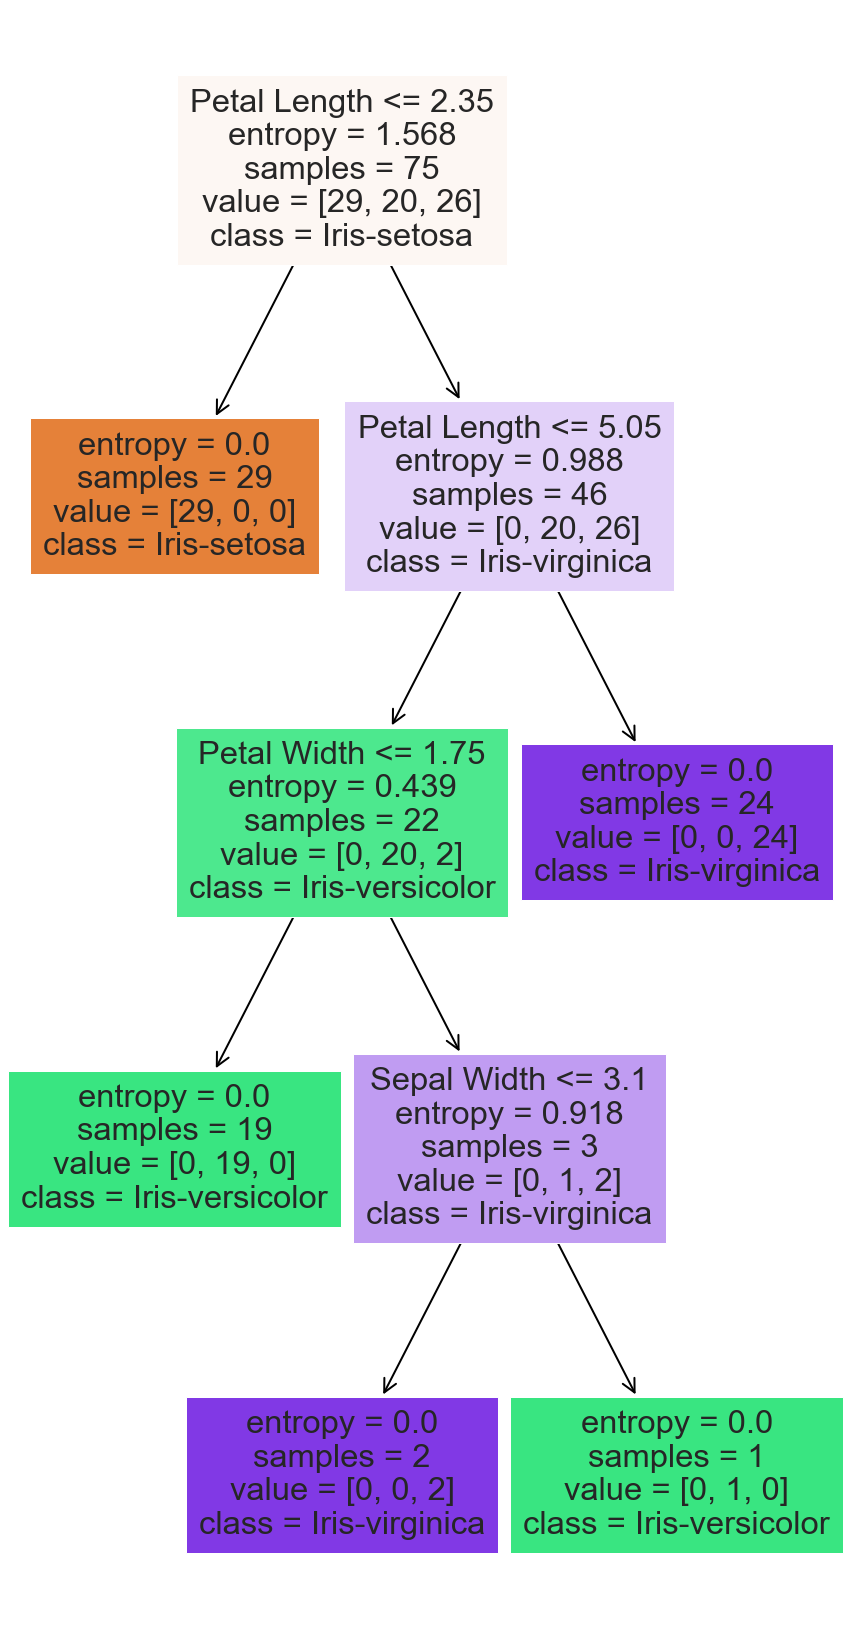

In [57]:
fig = plt.figure(figsize=(15,30))
output = tree.plot_tree(model, feature_names=features, class_names=target, filled=True)
for i in output:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)